In [39]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import sklearn.linear_model
from sklearn.metrics import r2_score

In [40]:
pres2016 = pd.read_csv("MergedMassData.csv")

pres2020 = pd.read_csv("MergedMassData.csv")

gov2014 = pd.read_csv("MergedMassDataGov.csv")

gov2018 = pd.read_csv("MergedMassDataGov.csv")

In [41]:
#cleaning for presidential election

pres2020 = pres2020.replace(",", "", regex = True)

pres2016 = pres2016.replace(",", "", regex = True)

pres2020["Democratic 2020"] = pd.to_numeric(pres2020["Democratic 2020"])

pres2020["Republican 2020"] = pd.to_numeric(pres2020["Republican 2020"])

pres2020["Total Votes Cast 2020"] = pd.to_numeric(pres2020["Total Votes Cast 2020"])

pres2020["Mexican 2019"] = pd.to_numeric(pres2020["Mexican 2019"])

pres2020["Puerto Rican 2019"] = pd.to_numeric(pres2020["Puerto Rican 2019"])

pres2020["Cuban 2019"] = pd.to_numeric(pres2020["Cuban 2019"])

pres2020["Other LatinX 2019"] = pd.to_numeric(pres2020["Other LatinX 2019"])

pres2020["Total Population 2019"] = pd.to_numeric(pres2020["Total Population 2019"]) 

pres2016["Democratic 2016"] = pd.to_numeric(pres2016["Democratic 2016"])

pres2016["Republican 2016"] = pd.to_numeric(pres2016["Republican 2016"])

pres2016["Total Votes Cast"] = pd.to_numeric(pres2016["Total Votes Cast"])

pres2016["Mexican 2016"] = pd.to_numeric(pres2016["Mexican 2016"])

pres2016["Puerto Rican 2016"] = pd.to_numeric(pres2016["Puerto Rican 2016"])

pres2016["Cuban 2016"] = pd.to_numeric(pres2016["Cuban 2016"])

pres2016["Other LatinX 2016"] = pd.to_numeric(pres2016["Other LatinX 2016"])

pres2016["Total Population 2016"] = pd.to_numeric(pres2016["Total Population 2016"])

In [42]:
#cleaning for governors election

gov2014 = gov2014.replace(",", "", regex = True)

gov2018 = gov2018.replace(",", "", regex = True)

gov2018["Democratic 2018"] = pd.to_numeric(gov2018["Democratic 2018"])

gov2018["Republican 2018"] = pd.to_numeric(gov2018["Republican 2018"])

gov2018["Total Votes Cast 2018"] = pd.to_numeric(gov2018["Total Votes Cast 2018"])

gov2018["Mexican 2018"] = pd.to_numeric(gov2018["Mexican 2018"])

gov2018["Puerto Rican 2018"] = pd.to_numeric(gov2018["Puerto Rican 2018"])

gov2018["Cuban 2018"] = pd.to_numeric(gov2018["Cuban 2018"])

gov2018["Other LatinX 2018"] = pd.to_numeric(gov2018["Other LatinX 2018"])

gov2018["Total Population 2018"] = pd.to_numeric(gov2018["Total Population 2018"])

gov2014["Democratic 2014"] = pd.to_numeric(gov2014["Democratic 2014"])

gov2014["Republican 2014"] = pd.to_numeric(gov2014["Republican 2014"])

gov2014["Total Votes Cast 2014"] = pd.to_numeric(gov2014["Total Votes Cast 2014"])

gov2014["Mexican 2014"] = pd.to_numeric(gov2014["Mexican 2014"])

gov2014["Puerto Rican 2014"] = pd.to_numeric(gov2014["Puerto Rican 2014"])

gov2014["Cuban 2014"] = pd.to_numeric(gov2014["Cuban 2014"])

gov2014["Other LatinX 2014"] = pd.to_numeric(gov2014["Other LatinX 2014"])

gov2014["Total Population 2014"] = pd.to_numeric(gov2014["Total Population 2014"]) 

In [43]:
#analyzing changes between the most recent elections for president

changeDemPres = (pres2020["Democratic 2020"] / pres2020["Total Votes Cast 2020"]) - (pres2016["Democratic 2016"] / pres2016["Total Votes Cast"])

changeRepPres = (pres2020["Republican 2020"] / pres2020["Total Votes Cast 2020"]) - (pres2016["Republican 2016"] / pres2016["Total Votes Cast"])

changeMexPres = (pres2020["Mexican 2019"] / pres2020["Total Population 2019"]) - (pres2016["Mexican 2016"] / pres2016["Total Population 2016"])

changePRPres = (pres2020["Puerto Rican 2019"] / pres2020["Total Population 2019"]) - (pres2016["Puerto Rican 2016"] / pres2016["Total Population 2016"])

changeCubanPres = (pres2020["Cuban 2019"] / pres2020["Total Population 2019"]) - (pres2016["Cuban 2016"] / pres2016["Total Population 2016"])

changeOtherLatinXPres = (pres2020["Other LatinX 2019"] / pres2020["Total Population 2019"]) - (pres2016["Other LatinX 2016"] / pres2016["Total Population 2016"])

changeTotalLatinXPres = ((pres2020["Mexican 2019"] + pres2020["Puerto Rican 2019"] + pres2020["Cuban 2019"] + pres2020["Other LatinX 2019"])
 / pres2020["Total Population 2019"]) - ((pres2016["Mexican 2016"] + pres2016["Puerto Rican 2016"] + pres2016["Cuban 2016"] +pres2016["Other LatinX 2016"])
 / pres2016["Total Population 2016"])

totalLatinXPres2020 = (pres2020["Mexican 2019"] + pres2020["Puerto Rican 2019"] + pres2020["Cuban 2019"] + pres2020["Other LatinX 2019"]) / pres2020["Total Population 2019"]
                                         
totalDemSupport2020 = (pres2020["Democratic 2020"] / pres2020["Total Votes Cast 2020"])     

totalRepSupport2020 = (pres2020["Republican 2020"] / pres2020["Total Votes Cast 2020"])     

mexPop2020 =  pres2020["Mexican 2019"] / pres2020["Total Population 2019"]

prPop2020 = pres2020["Puerto Rican 2019"] / pres2020["Total Population 2019"]

cubanPop2020 = pres2020["Cuban 2019"] / pres2020["Total Population 2019"]

otherPop2020 = pres2020["Other LatinX 2019"] / pres2020["Total Population 2019"]

totalLatinXPres2016 = (pres2016["Mexican 2016"] + pres2016["Puerto Rican 2016"] + pres2016["Cuban 2016"] +pres2016["Other LatinX 2016"]) / pres2016["Total Population 2016"]
                                         
totalDemSupport2016 = (pres2016["Democratic 2016"] / pres2016["Total Votes Cast"])     

totalRepSupport2016 = (pres2016["Republican 2016"] / pres2016["Total Votes Cast"])       

mexPop2016 =  pres2020["Mexican 2016"] / pres2020["Total Population 2016"]

prPop2016 = pres2020["Puerto Rican 2016"] / pres2020["Total Population 2016"]

cubanPop2016 = pres2020["Cuban 2016"] / pres2020["Total Population 2016"]

otherPop2016 = pres2020["Other LatinX 2016"] / pres2020["Total Population 2016"]          


In [44]:
#analyzing changes between most recent elections for governors

changeDemGov = (gov2018["Democratic 2018"] / gov2018["Total Votes Cast 2018"]) - (gov2014["Democratic 2014"] / gov2014["Total Votes Cast 2014"])

changeRepGov = (gov2018["Republican 2018"] / gov2018["Total Votes Cast 2018"]) - (gov2014["Republican 2014"] / gov2014["Total Votes Cast 2014"])

changeMexGov = (gov2018["Mexican 2018"] / gov2018["Total Population 2018"]) - (gov2014["Mexican 2014"] / gov2014["Total Population 2014"])

changePRGov = (gov2018["Puerto Rican 2018"] / gov2018["Total Population 2018"]) - (gov2014["Puerto Rican 2014"] / gov2014["Total Population 2014"])

changeCubanGov = (gov2018["Cuban 2018"] / gov2018["Total Population 2018"]) - (gov2014["Cuban 2014"] / gov2014["Total Population 2014"])

changeOtherLatinXGov = (gov2018["Other LatinX 2018"] / gov2018["Total Population 2018"]) - (gov2014["Other LatinX 2014"] / gov2014["Total Population 2014"])

changeTotalLatinXGov = ((gov2018["Mexican 2018"] + gov2018["Puerto Rican 2018"] + gov2018["Cuban 2018"] + gov2018["Other LatinX 2018"])
  / gov2018["Total Population 2018"]) - ((gov2014["Mexican 2014"] + gov2014["Puerto Rican 2014"] + gov2014["Cuban 2014"] + gov2014["Other LatinX 2014"]) / gov2014["Total Population 2014"])

totalLatinXGov2018 = (gov2018["Mexican 2018"] + gov2018["Puerto Rican 2018"] + gov2018["Cuban 2018"] + gov2018["Other LatinX 2018"]) / gov2018["Total Population 2018"]
                                         
totalDemSupport2018 = (gov2018["Democratic 2018"] / gov2018["Total Votes Cast 2018"])     

totalRepSupport2018 = (gov2018["Republican 2018"] / gov2018["Total Votes Cast 2018"])     

mexPop2018 =  gov2018["Mexican 2018"] / gov2018["Total Population 2018"]

prPop2018 = gov2018["Puerto Rican 2018"] / gov2018["Total Population 2018"]

cubanPop2018 = gov2018["Cuban 2018"] / gov2018["Total Population 2018"]

otherPop2018 = gov2018["Other LatinX 2018"] / gov2018["Total Population 2018"]

totalLatinXGov2014 = (gov2014["Mexican 2014"] + gov2014["Puerto Rican 2014"] + gov2014["Cuban 2014"] + gov2014["Other LatinX 2014"]) / gov2014["Total Population 2014"]
                                         
totalDemSupport2014 = (gov2014["Democratic 2014"] / gov2014["Total Votes Cast 2014"])     

totalRepSupport2014 = (gov2014["Republican 2014"] / gov2014["Total Votes Cast 2014"])       

mexPop2014 =  gov2014["Mexican 2014"] / gov2014["Total Population 2014"]

prPop2014 = gov2014["Puerto Rican 2014"] / gov2014["Total Population 2014"]

cubanPop2014 = gov2014["Cuban 2014"] / gov2014["Total Population 2014"]

otherPop2014 = gov2014["Other LatinX 2014"] / gov2014["Total Population 2014"]  

In [45]:
#merge presidential election changes with demographic changes during those years

merged_presidential = pd.DataFrame({"change in democratic support" : changeDemPres, "change in republican support" : changeRepPres, "change in mexican population" : changeMexPres,"% mexican population 2020" : mexPop2020, "% mexican population 2016" : mexPop2016,
                                    "change in puerto rican population" : changePRPres, "% pr population 2020" : prPop2020, "% pr population 2016" : prPop2016,
                                    "change in cuban population" : changeCubanPres, "% cuban population 2020" : cubanPop2020, "% cuban population 2016" : cubanPop2016,
                                    "change in other LatinX population" : changeOtherLatinXPres,"% other LatinX population 2020" : otherPop2020, "% other LatinX population 2016" : otherPop2016,
                                    "change in total LatinX population" : changeTotalLatinXPres, "% LatinX 2020" : totalLatinXPres2020, "% LatinX 2016" :totalLatinXPres2016, "% Democratic Support 2020" :totalDemSupport2020,
                                    "% Republican Support 2020" : totalRepSupport2020, "% LatinX 2016" : totalLatinXPres2016, "% Democratic Support 2016" :totalDemSupport2016, "% Republican Support 2016" : totalRepSupport2016})

merged_presidential = merged_presidential.replace([np.inf, -np.inf], np.nan)    #replace inf values by NaN, occurs when starting value is zero

merged_presidential = merged_presidential.fillna(0)     #repalce any NaN with 0        

In [46]:
#merge governors election changes with demographic changes during those years

merged_governors = pd.DataFrame({"change in democratic support" : changeDemGov, "change in republican support" : changeRepGov, "change in mexican population" : changeMexGov,"% mexican population 2018" : mexPop2018, "% mexican population 2014" : mexPop2014,
                                    "change in puerto rican population" : changePRGov, "% pr population 2018" : prPop2018, "% pr population 2014" : prPop2014,
                                    "change in cuban population" : changeCubanGov, "% cuban population 2018" : cubanPop2018, "% cuban population 2014" : cubanPop2014,
                                    "change in other LatinX population" : changeOtherLatinXGov,"% other LatinX population 2018" : otherPop2018, "% other LatinX population 2014" : otherPop2014,
                                    "change in total LatinX population" : changeTotalLatinXGov, "% LatinX 2018" : totalLatinXGov2018, "% LatinX 2014" :totalLatinXGov2014, "% Democratic Support 2018" :totalDemSupport2018,
                                    "% Republican Support 2018" : totalRepSupport2018, "% LatinX 2014" : totalLatinXGov2014, "% Democratic Support 2014" :totalDemSupport2014, "% Republican Support 2014" : totalRepSupport2014})

merged_governors = merged_governors.replace([np.inf, -np.inf], np.nan)    #replace inf values by NaN, occurs when starting value is zero

merged_governors = merged_governors.fillna(0)     #repalce any NaN with 0 

In [47]:
#set up for linear regression

linregDem = LinearRegression()

linregRep = LinearRegression()

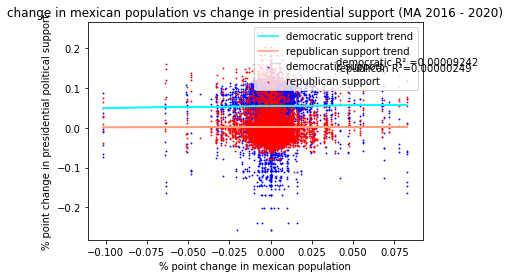

In [48]:
#plot presidential election data for mexican population

plt.scatter(merged_presidential["change in mexican population"], merged_presidential["change in democratic support"], color = "blue", label = "democratic support", s= 0.7)

plt.scatter(merged_presidential["change in mexican population"], merged_presidential["change in republican support"], color = "red", label = "republican support", s=0.7)

mexPop = merged_presidential["change in mexican population"].values.reshape(-1, 1)

demSupport = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(mexPop, demSupport)

Y_predMexDem = linregDem.predict(mexPop)

mexDemR2 = r2_score(demSupport, Y_predMexDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(mexDemR2)))

plt.plot(mexPop, Y_predMexDem, color='cyan', label = "democratic support trend")

repSupport = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(mexPop, repSupport)

Y_predMexRep = linregRep.predict(mexPop)

mexRepR2 = r2_score(repSupport, Y_predMexRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(mexRepR2)))

plt.plot(mexPop, Y_predMexRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in mexican population")

plt.ylabel("% point change in presidential political support")

plt.title("change in mexican population vs change in presidential support (MA 2016 - 2020)")

plt.show()


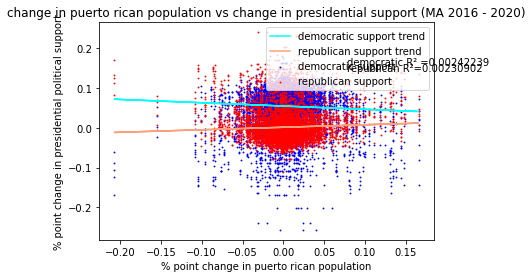

In [49]:
#plot presidential election data for puetro rican population

plt.scatter(merged_presidential["change in puerto rican population"], merged_presidential["change in democratic support"], color = "blue", label = "democratic support", s= 0.7)

plt.scatter(merged_presidential["change in puerto rican population"], merged_presidential["change in republican support"], color = "red", label = "republican support", s=0.7)

prPop = merged_presidential["change in puerto rican population"].values.reshape(-1, 1)

linregDem.fit(prPop, demSupport)

Y_predprDem = linregDem.predict(prPop)

prDemR2 = r2_score(demSupport, Y_predprDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(prDemR2)))

plt.plot(prPop, Y_predprDem, color='cyan', label = "democratic support trend")

linregRep.fit(prPop, repSupport)

Y_predprRep = linregRep.predict(prPop)

prRepR2 = r2_score(repSupport, Y_predprRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(prRepR2)))

plt.plot(prPop, Y_predprRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in puerto rican population")

plt.ylabel("% point change in presidential political support")

plt.title("change in puerto rican population vs change in presidential support (MA 2016 - 2020)")

plt.show()

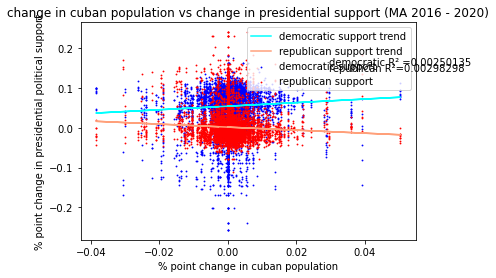

In [50]:
#plot presidential election data for cuban population

plt.scatter(merged_presidential["change in cuban population"], merged_presidential["change in democratic support"], color = "blue", label = "democratic support", s=0.7)

plt.scatter(merged_presidential["change in cuban population"], merged_presidential["change in republican support"], color = "red", label = "republican support",s=0.7)

cubanPop = merged_presidential["change in cuban population"].values.reshape(-1, 1)

linregDem.fit(cubanPop, demSupport)

Y_predcubanDem = linregDem.predict(cubanPop)

cubanDemR2 = r2_score(demSupport, Y_predcubanDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(cubanDemR2)))

plt.plot(cubanPop, Y_predcubanDem, color='cyan', label = "democratic support trend")

linregRep.fit(cubanPop, repSupport)

Y_predcubanRep = linregRep.predict(cubanPop)

cubanRepR2 = r2_score(repSupport, Y_predcubanRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(cubanRepR2)))

plt.plot(cubanPop, Y_predcubanRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in cuban population")

plt.ylabel("% point change in presidential political support")

plt.title("change in cuban population vs change in presidential support (MA 2016 - 2020)")

plt.show()

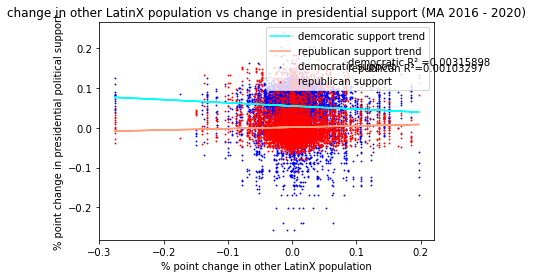

In [51]:
#plot presidential election data for other LatinX populations

plt.scatter(merged_presidential["change in other LatinX population"], merged_presidential["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_presidential["change in other LatinX population"], merged_presidential["change in republican support"], color = "red", label = "republican support",s=0.7)

otherPop = merged_presidential["change in other LatinX population"].values.reshape(-1, 1)

linregDem.fit(otherPop, demSupport)

Y_predotherDem = linregDem.predict(otherPop)

otherDemR2 = r2_score(demSupport, Y_predotherDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(otherDemR2)))

plt.plot(otherPop, Y_predotherDem, color='cyan', label = "demcoratic support trend")

linregRep.fit(otherPop, repSupport)

Y_predotherRep = linregRep.predict(otherPop)

otherRepR2 = r2_score(repSupport, Y_predotherRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(otherRepR2)))

plt.plot(otherPop, Y_predotherRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in other LatinX population")

plt.ylabel("% point change in presidential political support")

plt.title("change in other LatinX population vs change in presidential support (MA 2016 - 2020)")

plt.show()

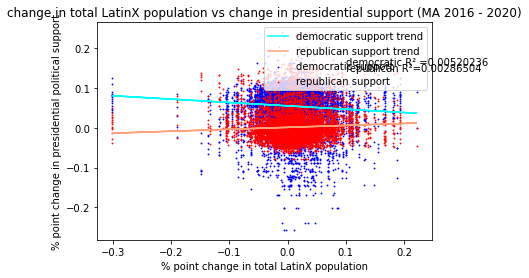

In [52]:
#plot presidential election data for Total LatinX populations

plt.scatter(merged_presidential["change in total LatinX population"], merged_presidential["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_presidential["change in total LatinX population"], merged_presidential["change in republican support"], color = "red", label = "republican support",s=0.7)

totalPop = merged_presidential["change in total LatinX population"].values.reshape(-1, 1)

linregDem.fit(totalPop, demSupport)

Y_predtotalDem = linregDem.predict(totalPop)

totalDemR2 = r2_score(demSupport, Y_predtotalDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(totalDemR2)))

plt.plot(totalPop, Y_predtotalDem, color='cyan', label = "democratic support trend")

linregRep.fit(totalPop, repSupport)

Y_predtotalRep = linregRep.predict(totalPop)

totalRepR2 = r2_score(repSupport, Y_predtotalRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(totalRepR2)))

plt.plot(totalPop, Y_predtotalRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in total LatinX population")

plt.ylabel("% point change in presidential political support")

plt.title("change in total LatinX population vs change in presidential support (MA 2016 - 2020)")

plt.show()

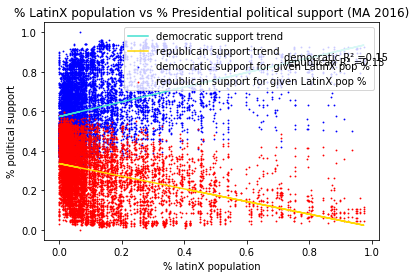

In [53]:
# percent LatinX vs percent presidential political support 2016

plt.scatter(totalLatinXPres2016, totalDemSupport2016, color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXPres2016, totalRepSupport2016, color = "red", label = 'republican support for given LatinX pop %', s=0.7)

total2016 = merged_presidential["% LatinX 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(total2016, dem2016)

Y_predDemSupport = linregDem.predict(total2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(total2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(total2016, rep2016)

Y_predRepSupport = linregRep.predict(total2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(total2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("% political support")

plt.title("% LatinX population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

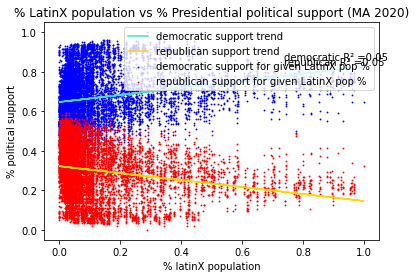

In [54]:
# percent LatinX vs percent presidential political support 2020

plt.scatter(totalLatinXPres2020, totalDemSupport2020, color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXPres2020, totalRepSupport2020, color = "red", label = 'republican support for given LatinX pop %', s=0.7)

total2020 = merged_presidential["% LatinX 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["% Democratic Support 2020"].values.reshape(-1, 1)

linregDem.fit(total2020, dem2020)

Y_predDemSupport = linregDem.predict(total2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(total2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["% Republican Support 2020"].values.reshape(-1, 1)

linregRep.fit(total2020, rep2020)

Y_predRepSupport = linregRep.predict(total2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(total2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("% political support")

plt.title("% LatinX population vs % Presidential political support (MA 2020)")

plt.legend(loc="upper right")

plt.show()

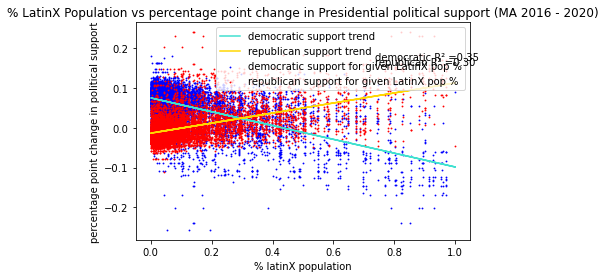

In [55]:
#percent total latinX vs percentage point change presidential political support 2016 - 2020

plt.scatter(totalLatinXPres2020, merged_presidential["change in democratic support"], color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXPres2020, merged_presidential["change in republican support"], color = "red", label = 'republican support for given LatinX pop %', s=0.7)

latinX2020 = merged_presidential["% LatinX 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(latinX2020, dem2020)

Y_predDemSupport = linregDem.predict(latinX2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(latinX2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(latinX2020, rep2020)

Y_predRepSupport = linregRep.predict(latinX2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(latinX2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("percentage point change in political support")

plt.title("% LatinX Population vs percentage point change in Presidential political support (MA 2016 - 2020)")

plt.legend(loc="upper right")

plt.show()


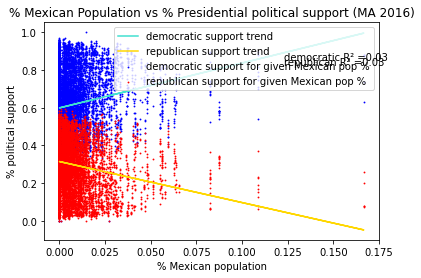

In [56]:
#percent mexican vs percent presidential political support 2016

plt.scatter(mexPop2016, merged_presidential["% Democratic Support 2016"], color = "blue", label = 'democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2016, merged_presidential["% Republican Support 2016"], color = "red", label = 'republican support for given Mexican pop %', s=0.7)

mex2016 = merged_presidential["% mexican population 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(mex2016, dem2016)

Y_predDemSupport = linregDem.predict(mex2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(mex2016, rep2016)

Y_predRepSupport = linregRep.predict(mex2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("% political support")

plt.title("% Mexican Population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

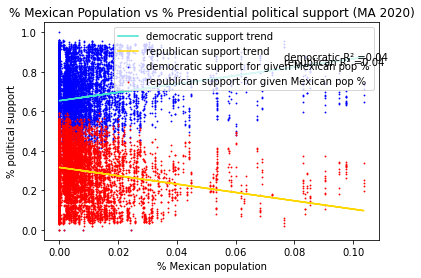

In [57]:
#percent mexican vs percent presidential political support 2020

plt.scatter(mexPop2020, merged_presidential["% Democratic Support 2020"], color = "blue", label = 'democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2020, merged_presidential["% Republican Support 2020"], color = "red", label = 'republican support for given Mexican pop %', s=0.7)

mex2020 = merged_presidential["% mexican population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["% Democratic Support 2020"].values.reshape(-1, 1)

linregDem.fit(mex2020, dem2020)

Y_predDemSupport = linregDem.predict(mex2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["% Republican Support 2020"].values.reshape(-1, 1)

linregRep.fit(mex2020, rep2020)

Y_predRepSupport = linregRep.predict(mex2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("% political support")

plt.title("% Mexican Population vs % Presidential political support (MA 2020)")

plt.legend(loc="upper right")

plt.show()


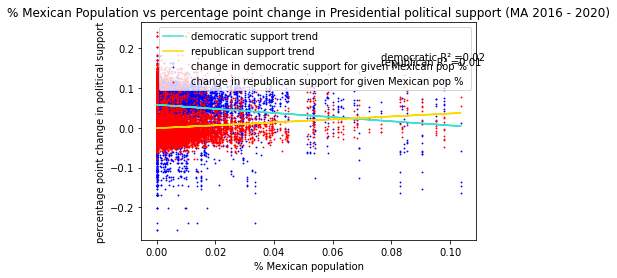

In [58]:
#percent mexican vs percentage point change presidential political support 2016 - 2020

plt.scatter(mexPop2020, merged_presidential["change in democratic support"], color = "blue", label = 'change in democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2020, merged_presidential["change in republican support"], color = "red", label = 'change in republican support for given Mexican pop %', s=0.7)

mex2020 = merged_presidential["% mexican population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(mex2020, dem2020)

Y_predDemSupport = linregDem.predict(mex2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(mex2020, rep2020)

Y_predRepSupport = linregRep.predict(mex2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("percentage point change in political support")

plt.title("% Mexican Population vs percentage point change in Presidential political support (MA 2016 - 2020)")

plt.legend(loc="upper right")

plt.show()

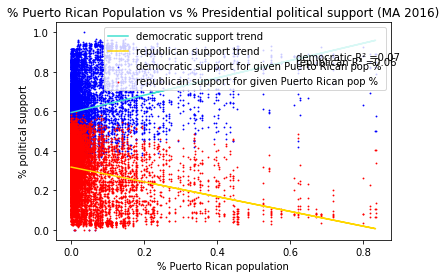

In [59]:
#percent pr vs percent presidential political support 2016

plt.scatter(prPop2016, merged_presidential["% Democratic Support 2016"], color = "blue", label = 'democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2016, merged_presidential["% Republican Support 2016"], color = "red", label = 'republican support for given Puerto Rican pop %', s=0.7)

pr2016 = merged_presidential["% pr population 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(pr2016, dem2016)

Y_predDemSupport = linregDem.predict(pr2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(pr2016, rep2016)

Y_predRepSupport = linregRep.predict(pr2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("% political support")

plt.title("% Puerto Rican Population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

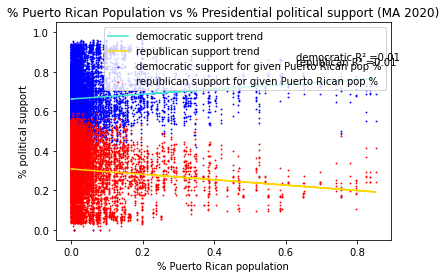

In [60]:
#percent puerto rican vs percent presidential political support 2020

plt.scatter(prPop2020, merged_presidential["% Democratic Support 2020"], color = "blue", label = 'democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2020, merged_presidential["% Republican Support 2020"], color = "red", label = 'republican support for given Puerto Rican pop %', s=0.7)

pr2020 = merged_presidential["% pr population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["% Democratic Support 2020"].values.reshape(-1, 1)

linregDem.fit(pr2020, dem2020)

Y_predDemSupport = linregDem.predict(pr2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["% Republican Support 2020"].values.reshape(-1, 1)

linregRep.fit(pr2020, rep2020)

Y_predRepSupport = linregRep.predict(pr2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("% political support")

plt.title("% Puerto Rican Population vs % Presidential political support (MA 2020)")

plt.legend(loc="upper right")

plt.show()

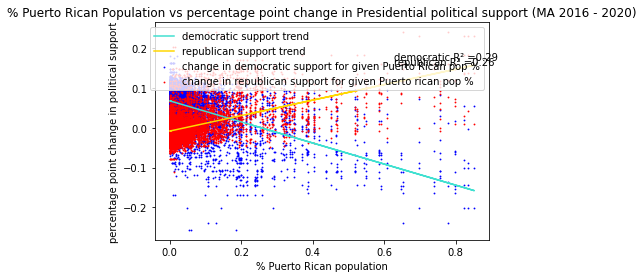

In [61]:
#percent puetro rican vs percentage point change presidential political support

plt.scatter(prPop2020, merged_presidential["change in democratic support"], color = "blue", label = 'change in democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2020, merged_presidential["change in republican support"], color = "red", label = 'change in republican support for given Puerto rican pop %', s=0.7)

pr2020 = merged_presidential["% pr population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(pr2020, dem2020)

Y_predDemSupport = linregDem.predict(pr2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(pr2020, rep2020)

Y_predRepSupport = linregRep.predict(pr2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("percentage point change in political support")

plt.title("% Puerto Rican Population vs percentage point change in Presidential political support (MA 2016 - 2020)")

plt.legend(loc="upper right")

plt.show()

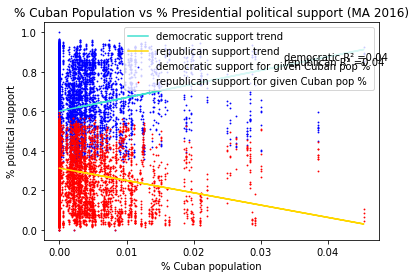

In [62]:
#percent cuban vs percent presidential political support 2016

plt.scatter(cubanPop2016, merged_presidential["% Democratic Support 2016"], color = "blue", label = 'democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2016, merged_presidential["% Republican Support 2016"], color = "red", label = 'republican support for given Cuban pop %', s=0.7)

cuban2016 = merged_presidential["% cuban population 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(cuban2016, dem2016)

Y_predDemSupport = linregDem.predict(cuban2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(cuban2016, rep2016)

Y_predRepSupport = linregRep.predict(cuban2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("% political support")

plt.title("% Cuban Population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

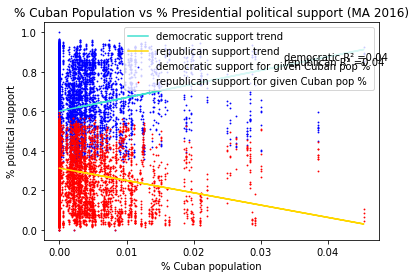

In [63]:
#percent cuban vs percent presidential political support 2016

plt.scatter(cubanPop2016, merged_presidential["% Democratic Support 2016"], color = "blue", label = 'democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2016, merged_presidential["% Republican Support 2016"], color = "red", label = 'republican support for given Cuban pop %', s=0.7)

cuban2016 = merged_presidential["% cuban population 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(cuban2016, dem2016)

Y_predDemSupport = linregDem.predict(cuban2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(cuban2016, rep2016)

Y_predRepSupport = linregRep.predict(cuban2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("% political support")

plt.title("% Cuban Population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

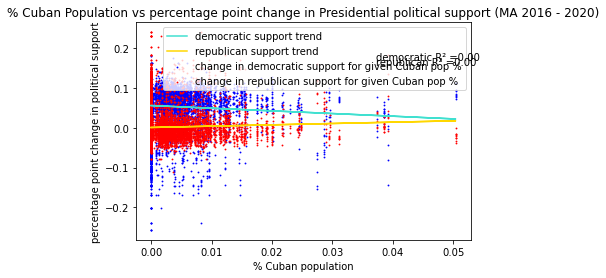

In [64]:
#percent cuban vs percentage point change presidential political support

plt.scatter(cubanPop2020, merged_presidential["change in democratic support"], color = "blue", label = 'change in democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2020, merged_presidential["change in republican support"], color = "red", label = 'change in republican support for given Cuban pop %', s=0.7)

cuban2020 = merged_presidential["% cuban population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(cuban2020, dem2020)

Y_predDemSupport = linregDem.predict(cuban2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(cuban2020, rep2020)

Y_predRepSupport = linregRep.predict(cuban2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("percentage point change in political support")

plt.title("% Cuban Population vs percentage point change in Presidential political support (MA 2016 - 2020)")

plt.legend(loc="upper right")

plt.show()

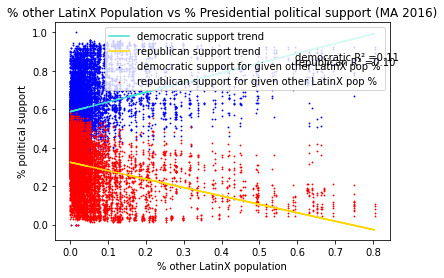

In [65]:
#percent other vs percent other LatinX political support 2016

plt.scatter(otherPop2016, merged_presidential["% Democratic Support 2016"], color = "blue", label = 'democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2016, merged_presidential["% Republican Support 2016"], color = "red", label = 'republican support for given other LatinX pop %', s=0.7)

other2016 = merged_presidential["% other LatinX population 2016"].values.reshape(-1, 1)

dem2016 = merged_presidential["% Democratic Support 2016"].values.reshape(-1, 1)

linregDem.fit(other2016, dem2016)

Y_predDemSupport = linregDem.predict(other2016)

demSupportR2 = r2_score(dem2016, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2016, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2016 = merged_presidential["% Republican Support 2016"].values.reshape(-1, 1)

linregRep.fit(other2016, rep2016)

Y_predRepSupport = linregRep.predict(other2016)

repSupportR2 = r2_score(rep2016, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2016, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("% political support")

plt.title("% other LatinX Population vs % Presidential political support (MA 2016)")

plt.legend(loc="upper right")

plt.show()

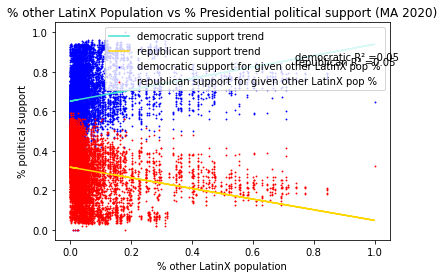

In [66]:
#percent other LatinX vs percent Presidential political support 2020

plt.scatter(otherPop2020, merged_presidential["% Democratic Support 2020"], color = "blue", label = 'democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2020, merged_presidential["% Republican Support 2020"], color = "red", label = 'republican support for given other LatinX pop %', s=0.7)

other2020 = merged_presidential["% other LatinX population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["% Democratic Support 2020"].values.reshape(-1, 1)

linregDem.fit(other2020, dem2020)

Y_predDemSupport = linregDem.predict(other2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["% Republican Support 2020"].values.reshape(-1, 1)

linregRep.fit(other2020, rep2020)

Y_predRepSupport = linregRep.predict(other2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("% political support")

plt.title("% other LatinX Population vs % Presidential political support (MA 2020)")

plt.legend(loc="upper right")

plt.show()

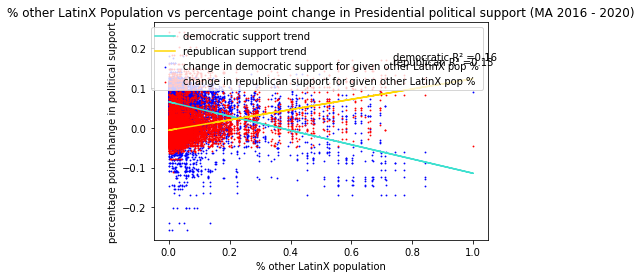

In [67]:
#percent other LatinX vs percentage point change presidential political support

plt.scatter(otherPop2020, merged_presidential["change in democratic support"], color = "blue", label = 'change in democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2020, merged_presidential["change in republican support"], color = "red", label = 'change in republican support for given other LatinX pop %', s=0.7)

other2020 = merged_presidential["% other LatinX population 2020"].values.reshape(-1, 1)

dem2020 = merged_presidential["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(other2020, dem2020)

Y_predDemSupport = linregDem.predict(other2020)

demSupportR2 = r2_score(dem2020, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2020, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2020 = merged_presidential["change in republican support"].values.reshape(-1, 1)

linregRep.fit(other2020, rep2020)

Y_predRepSupport = linregRep.predict(other2020)

repSupportR2 = r2_score(rep2020, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2020, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("percentage point change in political support")

plt.title("% other LatinX Population vs percentage point change in Presidential political support (MA 2016 - 2020)")

plt.legend(loc="upper right")

plt.show()

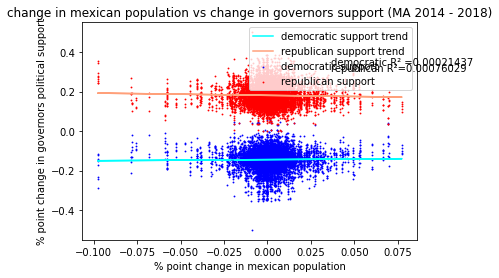

In [68]:
### GOVERNORS DATA and GRAPHS####

#plot governors election data for mexican population

plt.scatter(merged_governors["change in mexican population"], merged_governors["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_governors["change in mexican population"], merged_governors["change in republican support"], color = "red", label = "republican support",s=0.7)

mexPop = merged_governors["change in mexican population"].values.reshape(-1, 1)

demSupport = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem = LinearRegression()

linregDem.fit(mexPop, demSupport)

Y_predMexDem = linregDem.predict(mexPop)

mexDemR2 = r2_score(demSupport, Y_predMexDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(mexDemR2)))

plt.plot(mexPop, Y_predMexDem, color='cyan', label = "democratic support trend")

repSupport = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep = LinearRegression()

linregRep.fit(mexPop, repSupport)

Y_predMexRep = linregRep.predict(mexPop)

mexRepR2 = r2_score(repSupport, Y_predMexRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(mexRepR2)))

plt.plot(mexPop, Y_predMexRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in mexican population")

plt.ylabel("% point change in governors political support")

plt.title("change in mexican population vs change in governors support (MA 2014 - 2018)")

plt.show()


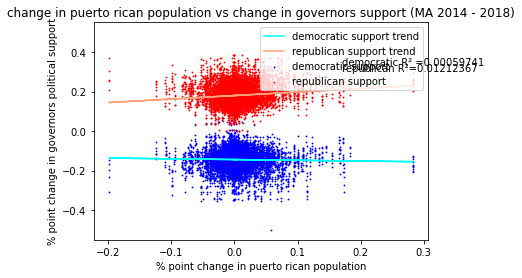

In [69]:
#plot governors election data for puetro rican population

plt.scatter(merged_governors["change in puerto rican population"], merged_governors["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_governors["change in puerto rican population"], merged_governors["change in republican support"], color = "red", label = "republican support",s=0.7)

prPop = merged_governors["change in puerto rican population"].values.reshape(-1, 1)

linregDem.fit(prPop, demSupport)

Y_predprDem = linregDem.predict(prPop)

prDemR2 = r2_score(demSupport, Y_predprDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(prDemR2)))

plt.plot(prPop, Y_predprDem, color='cyan', label = "democratic support trend")

linregRep.fit(prPop, repSupport)

Y_predprRep = linregRep.predict(prPop)

prRepR2 = r2_score(repSupport, Y_predprRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(prRepR2)))

plt.plot(prPop, Y_predprRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in puerto rican population")

plt.ylabel("% point change in governors political support")

plt.title("change in puerto rican population vs change in governors support (MA 2014 - 2018)")

plt.show()

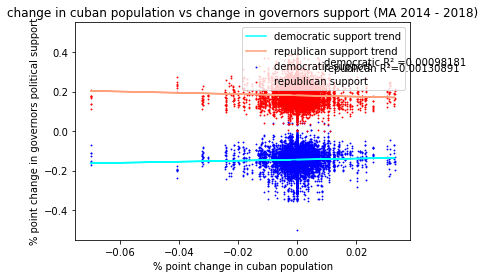

In [70]:
#plot governors election data for cuban population

plt.scatter(merged_governors["change in cuban population"], merged_governors["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_governors["change in cuban population"], merged_governors["change in republican support"], color = "red", label = "republican support",s=0.7)

cubanPop = merged_governors["change in cuban population"].values.reshape(-1, 1)

linregDem.fit(cubanPop, demSupport)

Y_predcubanDem = linregDem.predict(cubanPop)

cubanDemR2 = r2_score(demSupport, Y_predcubanDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(cubanDemR2)))

plt.plot(cubanPop, Y_predcubanDem, color='cyan', label = "democratic support trend")

linregRep.fit(cubanPop, repSupport)

Y_predcubanRep = linregRep.predict(cubanPop)

cubanRepR2 = r2_score(repSupport, Y_predcubanRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(cubanRepR2)))

plt.plot(cubanPop, Y_predcubanRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in cuban population")

plt.ylabel("% point change in governors political support")

plt.title("change in cuban population vs change in governors support (MA 2014 - 2018)")

plt.show()

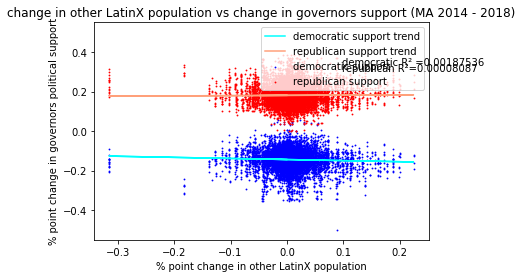

In [71]:
#plot governors election data for other LatinX populations

plt.scatter(merged_governors["change in other LatinX population"], merged_governors["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_governors["change in other LatinX population"], merged_governors["change in republican support"], color = "red", label = "republican support",s=0.7)

otherPop = merged_governors["change in other LatinX population"].values.reshape(-1, 1)

linregDem.fit(otherPop, demSupport)

Y_predotherDem = linregDem.predict(otherPop)

otherDemR2 = r2_score(demSupport, Y_predotherDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(otherDemR2)))

plt.plot(otherPop, Y_predotherDem, color='cyan', label = "democratic support trend")

linregRep.fit(otherPop, repSupport)

Y_predotherRep = linregRep.predict(otherPop)

otherRepR2 = r2_score(repSupport, Y_predotherRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(otherRepR2)))

plt.plot(otherPop, Y_predotherRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in other LatinX population")

plt.ylabel("% point change in governors political support")

plt.title("change in other LatinX population vs change in governors support (MA 2014 - 2018)")

plt.show()

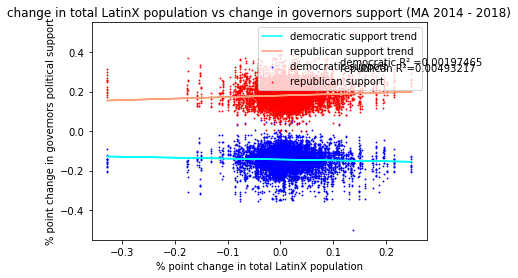

In [72]:
#plot governors election data for Total LatinX populations

plt.scatter(merged_governors["change in total LatinX population"], merged_governors["change in democratic support"], color = "blue", label = "democratic support",s=0.7)

plt.scatter(merged_governors["change in total LatinX population"], merged_governors["change in republican support"], color = "red", label = "republican support",s=0.7)

totalPop = merged_governors["change in total LatinX population"].values.reshape(-1, 1)

linregDem.fit(totalPop, demSupport)

Y_predtotalDem = linregDem.predict(totalPop)

totalDemR2 = r2_score(demSupport, Y_predtotalDem)

plt.figtext(.7, .73, ("democratic R² =" + "{:.8f}".format(totalDemR2)))

plt.plot(totalPop, Y_predtotalDem, color='cyan', label = "democratic support trend")

linregRep.fit(totalPop, repSupport)

Y_predtotalRep = linregRep.predict(totalPop)

totalRepR2 = r2_score(repSupport, Y_predtotalRep)

plt.figtext(.7, .71, ("republican R²=" + "{:.8f}".format(totalRepR2)))

plt.plot(totalPop, Y_predtotalRep, color='lightsalmon', label = "republican support trend")

plt.legend(loc="upper right")

plt.xlabel("% point change in total LatinX population")

plt.ylabel("% point change in governors political support")

plt.title("change in total LatinX population vs change in governors support (MA 2014 - 2018)")

plt.show()

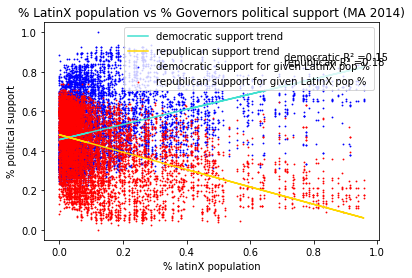

In [73]:
# percent LatinX vs percent governors political support 2014

plt.scatter(totalLatinXGov2014, totalDemSupport2014, color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXGov2014, totalRepSupport2014, color = "red", label = 'republican support for given LatinX pop %', s=0.7)

total2014 = merged_governors["% LatinX 2014"].values.reshape(-1, 1)

dem2014 = merged_governors["% Democratic Support 2014"].values.reshape(-1, 1)

linregDem.fit(total2014, dem2014)

Y_predDemSupport = linregDem.predict(total2014)

demSupportR2 = r2_score(dem2014, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(total2014, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2014 = merged_governors["% Republican Support 2014"].values.reshape(-1, 1)

linregRep.fit(total2014, rep2014)

Y_predRepSupport = linregRep.predict(total2014)

repSupportR2 = r2_score(rep2014, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(total2014, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("% political support")

plt.title("% LatinX population vs % Governors political support (MA 2014)")

plt.legend(loc="upper right")

plt.show()

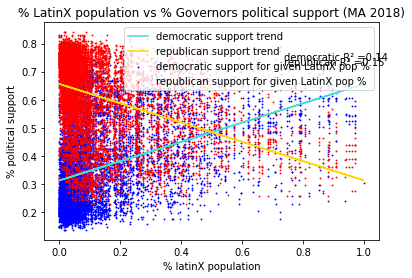

In [74]:
# percent LatinX vs percent governors political support 2018

plt.scatter(totalLatinXGov2018, totalDemSupport2018, color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXGov2018, totalRepSupport2018, color = "red", label = 'republican support for given LatinX pop %', s=0.7)

total2018 = merged_governors["% LatinX 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["% Democratic Support 2018"].values.reshape(-1, 1)

linregDem.fit(total2018, dem2018)

Y_predDemSupport = linregDem.predict(total2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(total2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["% Republican Support 2018"].values.reshape(-1, 1)

linregRep.fit(total2018, rep2018)

Y_predRepSupport = linregRep.predict(total2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(total2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("% political support")

plt.title("% LatinX population vs % Governors political support (MA 2018)")

plt.legend(loc="upper right")

plt.show()

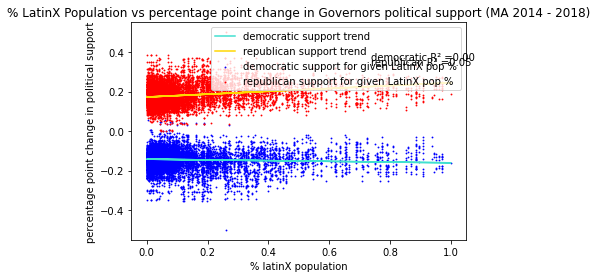

In [76]:
#percent total latinX vs percentage point change governors political support 

plt.scatter(totalLatinXGov2018, merged_governors["change in democratic support"], color = "blue", label = 'democratic support for given LatinX pop %', s=0.7)

plt.scatter(totalLatinXGov2018, merged_governors["change in republican support"], color = "red", label = 'republican support for given LatinX pop %', s=0.7)

latinX2018 = merged_governors["% LatinX 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(latinX2018, dem2018)

Y_predDemSupport = linregDem.predict(latinX2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(latinX2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep.fit(latinX2018, rep2018)

Y_predRepSupport = linregRep.predict(latinX2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(latinX2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% latinX population")

plt.ylabel("percentage point change in political support")

plt.title("% LatinX Population vs percentage point change in Governors political support (MA 2014 - 2018)")

plt.legend(loc="upper right")

plt.show()

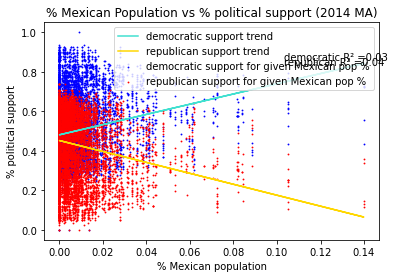

In [77]:
#percent mexican vs percent governors political support 2014

plt.scatter(mexPop2014, merged_governors["% Democratic Support 2014"], color = "blue", label = 'democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2014, merged_governors["% Republican Support 2014"], color = "red", label = 'republican support for given Mexican pop %', s=0.7)

mex2014 = merged_governors["% mexican population 2014"].values.reshape(-1, 1)

dem2014 = merged_governors["% Democratic Support 2014"].values.reshape(-1, 1)

linregDem.fit(mex2014, dem2014)

Y_predDemSupport = linregDem.predict(mex2014)

demSupportR2 = r2_score(dem2014, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2014, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2014 = merged_governors["% Republican Support 2014"].values.reshape(-1, 1)

linregRep.fit(mex2014, rep2014)

Y_predRepSupport = linregRep.predict(mex2014)

repSupportR2 = r2_score(rep2014, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2014, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("% political support")

plt.title("% Mexican Population vs % political support (2014 MA)")

plt.legend(loc="upper right")

plt.show()

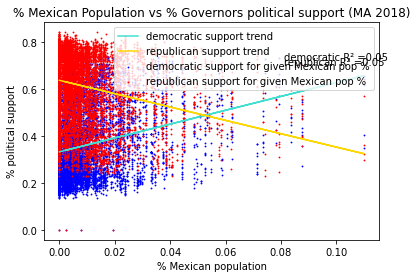

In [78]:
#percent mexican vs percent governors political support 2018

plt.scatter(mexPop2018, merged_governors["% Democratic Support 2018"], color = "blue", label = 'democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2018, merged_governors["% Republican Support 2018"], color = "red", label = 'republican support for given Mexican pop %', s=0.7)

mex2018 = merged_governors["% mexican population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["% Democratic Support 2018"].values.reshape(-1, 1)

linregDem.fit(mex2018, dem2018)

Y_predDemSupport = linregDem.predict(mex2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["% Republican Support 2018"].values.reshape(-1, 1)

linregRep.fit(mex2018, rep2018)

Y_predRepSupport = linregRep.predict(mex2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("% political support")

plt.title("% Mexican Population vs % Governors political support (MA 2018)")

plt.legend(loc="upper right")

plt.show()

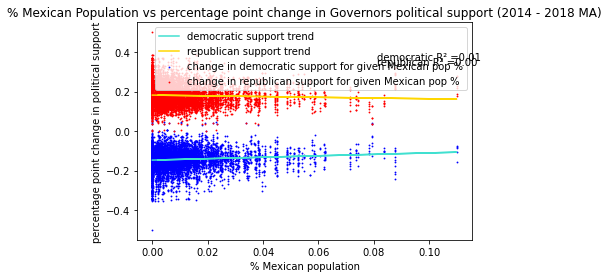

In [79]:
#percent mexican vs percentage point change govenors political support

plt.scatter(mexPop2018, merged_governors["change in democratic support"], color = "blue", label = 'change in democratic support for given Mexican pop %', s=0.7)

plt.scatter(mexPop2018, merged_governors["change in republican support"], color = "red", label = 'change in republican support for given Mexican pop %', s=0.7)

mex2018 = merged_governors["% mexican population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(mex2018, dem2018)

Y_predDemSupport = linregDem.predict(mex2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(mex2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep.fit(mex2018, rep2018)

Y_predRepSupport = linregRep.predict(mex2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(mex2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Mexican population")

plt.ylabel("percentage point change in political support")

plt.title("% Mexican Population vs percentage point change in Governors political support (2014 - 2018 MA)")

plt.legend(loc="upper right")

plt.show()

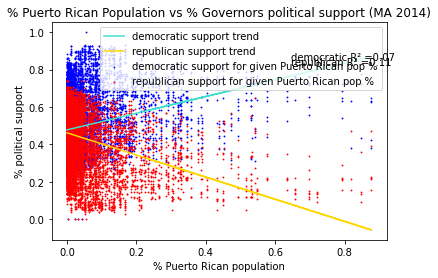

In [80]:
#percent pr vs percent governors political support 2014

plt.scatter(prPop2014, merged_governors["% Democratic Support 2014"], color = "blue", label = 'democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2014, merged_governors["% Republican Support 2014"], color = "red", label = 'republican support for given Puerto Rican pop %', s=0.7)

pr2014 = merged_governors["% pr population 2014"].values.reshape(-1, 1)

dem2014 = merged_governors["% Democratic Support 2014"].values.reshape(-1, 1)

linregDem.fit(pr2014, dem2014)

Y_predDemSupport = linregDem.predict(pr2014)

demSupportR2 = r2_score(dem2014, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2014, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2014 = merged_governors["% Republican Support 2014"].values.reshape(-1, 1)

linregRep.fit(pr2014, rep2014)

Y_predRepSupport = linregRep.predict(pr2014)

repSupportR2 = r2_score(rep2014, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2014, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("% political support")

plt.title("% Puerto Rican Population vs % Governors political support (MA 2014)")

plt.legend(loc="upper right")

plt.show()

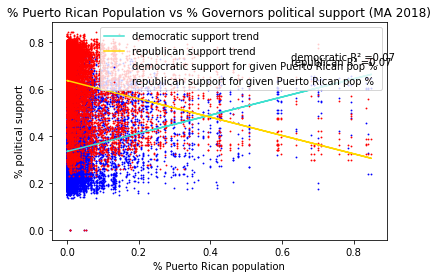

In [81]:
#percent puerto rican vs percent governors political support 2018

plt.scatter(prPop2018, merged_governors["% Democratic Support 2018"], color = "blue", label = 'democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2018, merged_governors["% Republican Support 2018"], color = "red", label = 'republican support for given Puerto Rican pop %', s=0.7)

pr2018 = merged_governors["% pr population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["% Democratic Support 2018"].values.reshape(-1, 1)

linregDem.fit(pr2018, dem2018)

Y_predDemSupport = linregDem.predict(pr2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["% Republican Support 2018"].values.reshape(-1, 1)

linregRep.fit(pr2018, rep2018)

Y_predRepSupport = linregRep.predict(pr2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("% political support")

plt.title("% Puerto Rican Population vs % Governors political support (MA 2018)")

plt.legend(loc="upper right")

plt.show()

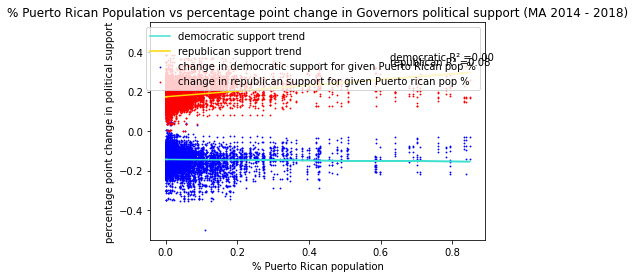

In [82]:
#percent puetro rican vs percentage point change governors political support

plt.scatter(prPop2018, merged_governors["change in democratic support"], color = "blue", label = 'change in democratic support for given Puerto Rican pop %', s=0.7)

plt.scatter(prPop2018, merged_governors["change in republican support"], color = "red", label = 'change in republican support for given Puerto rican pop %', s=0.7)

pr2018 = merged_governors["% pr population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(pr2018, dem2018)

Y_predDemSupport = linregDem.predict(pr2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(pr2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep.fit(pr2018, rep2018)

Y_predRepSupport = linregRep.predict(pr2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(pr2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Puerto Rican population")

plt.ylabel("percentage point change in political support")

plt.title("% Puerto Rican Population vs percentage point change in Governors political support (MA 2014 - 2018)")

plt.legend(loc="upper right")

plt.show()

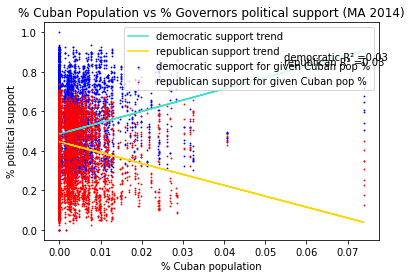

In [83]:
#percent cuban vs percent governors political support 2014

plt.scatter(cubanPop2014, merged_governors["% Democratic Support 2014"], color = "blue", label = 'democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2014, merged_governors["% Republican Support 2014"], color = "red", label = 'republican support for given Cuban pop %', s=0.7)

cuban2014 = merged_governors["% cuban population 2014"].values.reshape(-1, 1)

dem2014 = merged_governors["% Democratic Support 2014"].values.reshape(-1, 1)

linregDem.fit(cuban2014, dem2014)

Y_predDemSupport = linregDem.predict(cuban2014)

demSupportR2 = r2_score(dem2014, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2014, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2014 = merged_governors["% Republican Support 2014"].values.reshape(-1, 1)

linregRep.fit(cuban2014, rep2014)

Y_predRepSupport = linregRep.predict(cuban2014)

repSupportR2 = r2_score(rep2014, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2014, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("% political support")

plt.title("% Cuban Population vs % Governors political support (MA 2014)")

plt.legend(loc="upper right")

plt.show()

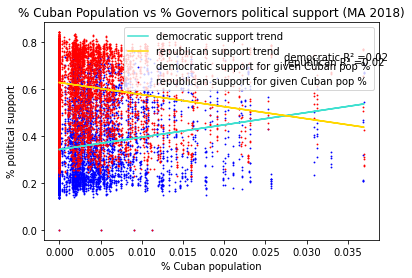

In [84]:
#percent cuban vs percent Governors political support 2018

plt.scatter(cubanPop2018, merged_governors["% Democratic Support 2018"], color = "blue", label = 'democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2018, merged_governors["% Republican Support 2018"], color = "red", label = 'republican support for given Cuban pop %', s=0.7)

cuban2018 = merged_governors["% cuban population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["% Democratic Support 2018"].values.reshape(-1, 1)

linregDem.fit(cuban2018, dem2018)

Y_predDemSupport = linregDem.predict(cuban2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["% Republican Support 2018"].values.reshape(-1, 1)

linregRep.fit(cuban2018, rep2018)

Y_predRepSupport = linregRep.predict(cuban2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("% political support")

plt.title("% Cuban Population vs % Governors political support (MA 2018)")

plt.legend(loc="upper right")

plt.show()

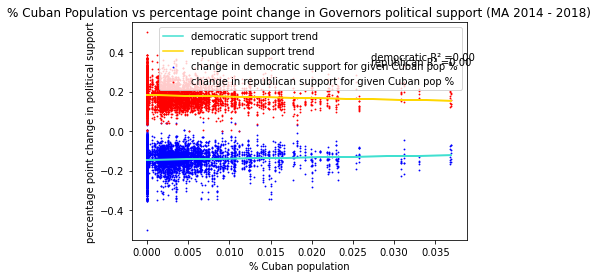

In [85]:
#percent cuban vs percentage point change governors political support

plt.scatter(cubanPop2018, merged_governors["change in democratic support"], color = "blue", label = 'change in democratic support for given Cuban pop %', s=0.7)

plt.scatter(cubanPop2018, merged_governors["change in republican support"], color = "red", label = 'change in republican support for given Cuban pop %', s=0.7)

cuban2018 = merged_governors["% cuban population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(cuban2018, dem2018)

Y_predDemSupport = linregDem.predict(cuban2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(cuban2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep.fit(cuban2018, rep2018)

Y_predRepSupport = linregRep.predict(cuban2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(cuban2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% Cuban population")

plt.ylabel("percentage point change in political support")

plt.title("% Cuban Population vs percentage point change in Governors political support (MA 2014 - 2018)")

plt.legend(loc="upper right")

plt.show()

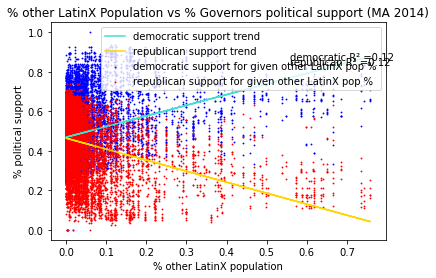

In [86]:
#percent other vs percent governors political support 2014

plt.scatter(otherPop2014, merged_governors["% Democratic Support 2014"], color = "blue", label = 'democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2014, merged_governors["% Republican Support 2014"], color = "red", label = 'republican support for given other LatinX pop %', s=0.7)

other2014 = merged_governors["% other LatinX population 2014"].values.reshape(-1, 1)

dem2014 = merged_governors["% Democratic Support 2014"].values.reshape(-1, 1)

linregDem.fit(other2014, dem2014)

Y_predDemSupport = linregDem.predict(other2014)

demSupportR2 = r2_score(dem2014, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2014, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2014 = merged_governors["% Republican Support 2014"].values.reshape(-1, 1)

linregRep.fit(other2014, rep2014)

Y_predRepSupport = linregRep.predict(other2014)

repSupportR2 = r2_score(rep2014, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2014, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("% political support")

plt.title("% other LatinX Population vs % Governors political support (MA 2014)")

plt.legend(loc="upper right")

plt.show()

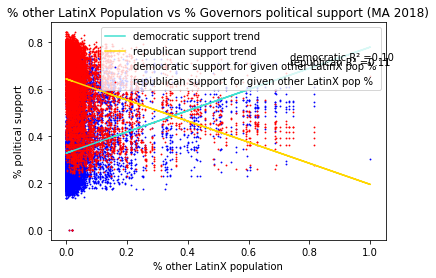

In [87]:
#percent other LatinX vs percent governors political support 2018

plt.scatter(otherPop2018, merged_governors["% Democratic Support 2018"], color = "blue", label = 'democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2018, merged_governors["% Republican Support 2018"], color = "red", label = 'republican support for given other LatinX pop %', s=0.7)

other2018 = merged_governors["% other LatinX population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["% Democratic Support 2018"].values.reshape(-1, 1)

linregDem.fit(other2018, dem2018)

Y_predDemSupport = linregDem.predict(other2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["% Republican Support 2018"].values.reshape(-1, 1)

linregRep.fit(other2018, rep2018)

Y_predRepSupport = linregRep.predict(other2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("% political support")

plt.title("% other LatinX Population vs % Governors political support (MA 2018)")

plt.legend(loc="upper right")

plt.show()

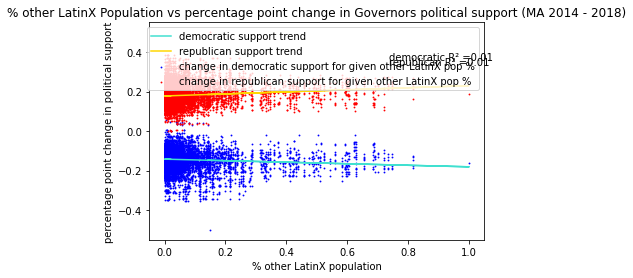

In [88]:
#percent other LatinX vs percentage point change governors political support

plt.scatter(otherPop2018, merged_governors["change in democratic support"], color = "blue", label = 'change in democratic support for given other LatinX pop %', s=0.7)

plt.scatter(otherPop2018, merged_governors["change in republican support"], color = "red", label = 'change in republican support for given other LatinX pop %', s=0.7)

other2018 = merged_governors["% other LatinX population 2018"].values.reshape(-1, 1)

dem2018 = merged_governors["change in democratic support"].values.reshape(-1, 1)

linregDem.fit(other2018, dem2018)

Y_predDemSupport = linregDem.predict(other2018)

demSupportR2 = r2_score(dem2018, Y_predDemSupport)

plt.figtext(.68, .75, ("democratic R² =" + "{:.2f}".format(demSupportR2)))

plt.plot(other2018, Y_predDemSupport, color='turquoise', label = "democratic support trend")

rep2018 = merged_governors["change in republican support"].values.reshape(-1, 1)

linregRep.fit(other2018, rep2018)

Y_predRepSupport = linregRep.predict(other2018)

repSupportR2 = r2_score(rep2018, Y_predRepSupport)

plt.figtext(.68, .73, ("republican R² =" + "{:.2f}".format(repSupportR2)))

plt.plot(other2018, Y_predRepSupport, color='gold', label = "republican support trend")

plt.xlabel("% other LatinX population")

plt.ylabel("percentage point change in political support")

plt.title("% other LatinX Population vs percentage point change in Governors political support (MA 2014 - 2018)")

plt.legend(loc="upper right")

plt.show()
